In [33]:
#---------#---------#---------#---------#---------#---------#---------#---------
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Softmax

tf.__version__

'2.20.0'

In [30]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [19]:
class_names = [
    'T-shirt/top', 'Pants', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 
    'Sneaker', 'Bag', 'Ankle boot']
n_classes = len(class_names)
n_classes

10

In [7]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
img_shape = x_train.shape[1:]
img_shape

(28, 28)

In [5]:
len(y_train)

60000

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], shape=(60000,), dtype=uint8)

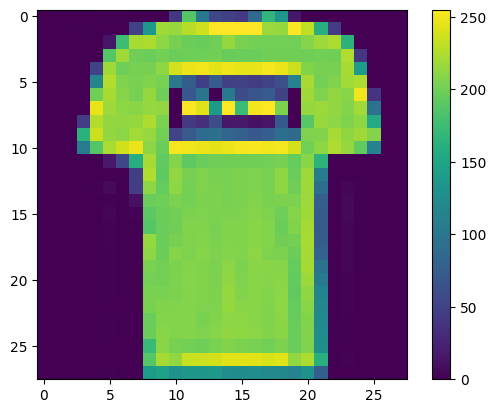

In [9]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar();

In [31]:
x_train = x_train / 255.
x_test = x_test / 255.

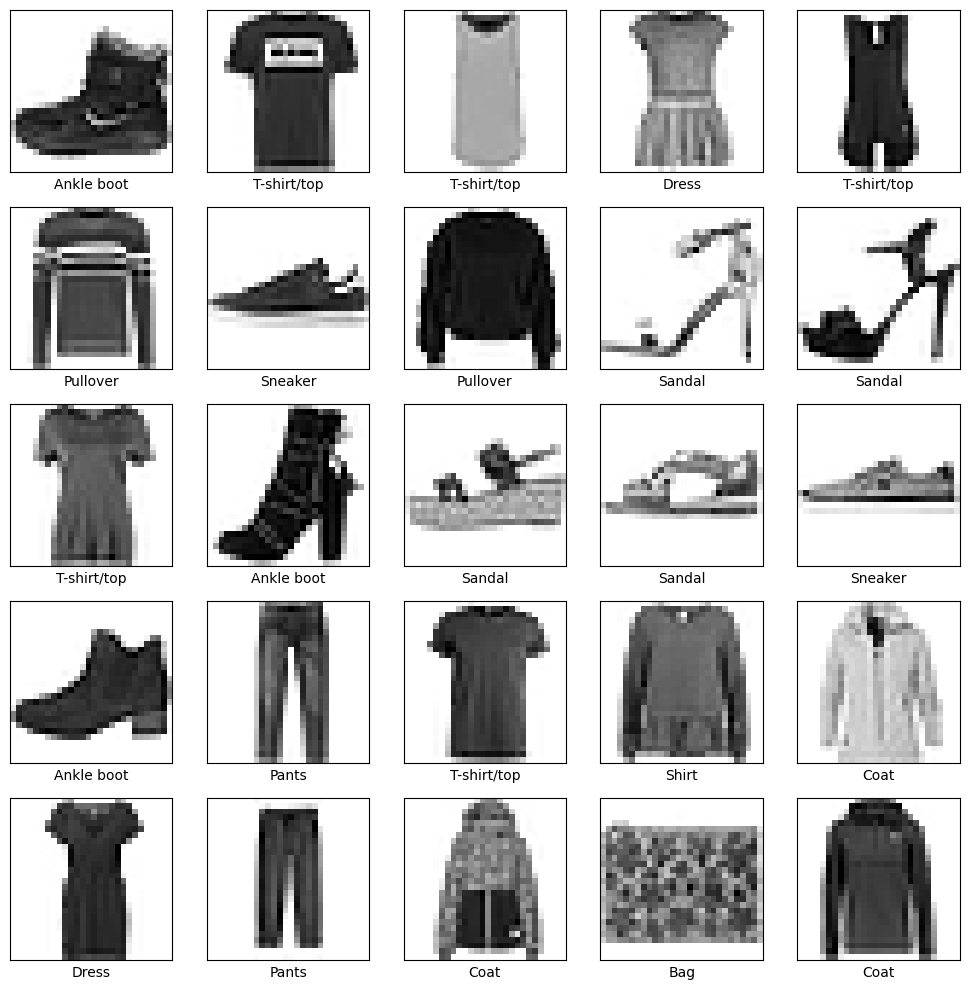

In [16]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout();

In [23]:
mod = Sequential([
    Input(img_shape),
    Flatten(), 
    Dense(128, activation='relu'), 
    Dense(n_classes)])

In [27]:
mod.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [28]:
mod.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.8216 - loss: 0.5065
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.8643 - loss: 0.3786
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.8769 - loss: 0.3402
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.8845 - loss: 0.3154
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - accuracy: 0.8915 - loss: 0.2969
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.8953 - loss: 0.2820
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.8998 - loss: 0.2711
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.9043 - loss: 0.2595
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.9071 - loss: 0.2493
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.9100 - loss: 0.2397


In [32]:
test_loss, test_acc = mod.evaluate(x_test, y_test, verbose=2)
test_acc

313/313 - 0s - 642us/step - accuracy: 0.8764 - loss: 0.3446


0.8763999938964844

In [34]:
prob_mod = Sequential([mod, Softmax()])

In [36]:
preds = prob_mod.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


In [37]:
preds[0]

array([4.0818865e-08, 3.1240610e-08, 6.4743277e-10, 3.4649791e-08,
       9.6905739e-10, 1.4687430e-05, 6.1923078e-07, 4.9850307e-03,
       7.8195427e-07, 9.9499863e-01], dtype=float32)

In [38]:
np.argmax(preds[0])

np.int64(9)

In [39]:
y_test[0]

np.uint8(9)

In [45]:
def plot_img(i, y_pred, y_true, img):
    y_true, img = y_true[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    y_label = np.argmax(y_pred)
    color = 'blue' if y_label == y_true else 'red'
    plt.xlabel(
        f'{class_names[y_label]} {100 * np.max(y_pred):2.0f}% '
        f'({class_names[y_label]})',
        color=color)

In [50]:
def plot_val_array(i , y_preds, y_true):
    y_true = y_true[i]
    plt.xticks(range(n_classes))
    plt.yticks([])
    this_plot = plt.bar(range(n_classes), y_preds, color='#777777')
    plt.ylim([0, 1])
    y_label = np.argmax(y_preds)
    this_plot[y_label].set_color('red')
    this_plot[y_true].set_color('blue')

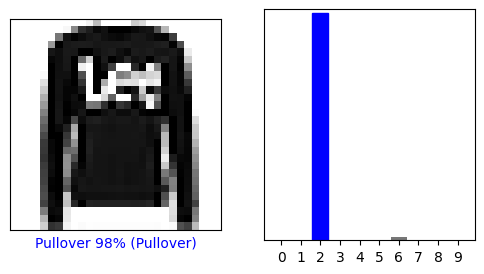

In [51]:
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_img(i, preds[i], y_test, x_test)
plt.subplot(1, 2, 2)
plot_val_array(i, preds[i], y_test);

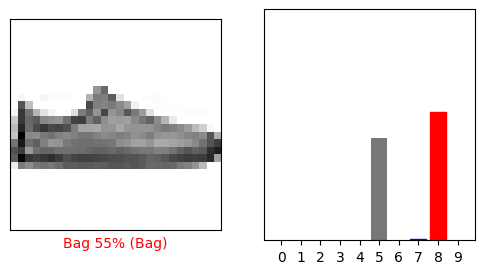

In [52]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_img(i, preds[i], y_test, x_test)
plt.subplot(1, 2, 2)
plot_val_array(i, preds[i], y_test);

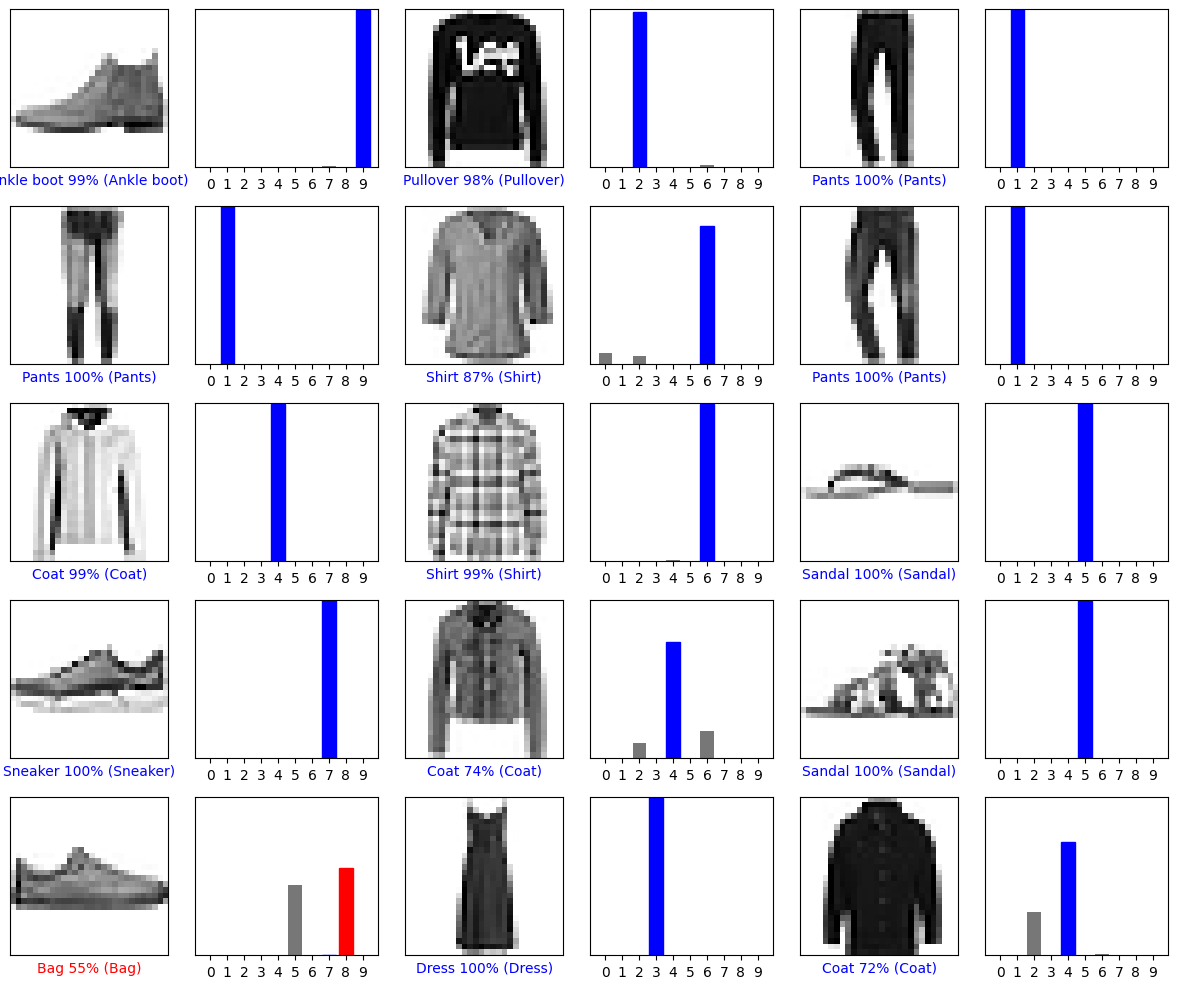

In [53]:
n_rows = 5
n_cols = 3
n_imgs = n_rows * n_cols
plt.figure(figsize=(2 * 2 * n_cols, 2*n_rows))
for i in range(n_imgs):
  plt.subplot(n_rows, 2 * n_cols, 2 * i + 1)
  plot_img(i, preds[i], y_test, x_test)
  plt.subplot(n_rows, 2 * n_cols, 2 * i + 2)
  plot_val_array(i, preds[i], y_test)
plt.tight_layout()

In [58]:
img_raw = x_test[1]
img = (np.expand_dims(img_raw, 0))  # (28, 28) -> (1, 28, 28)
pred = prob_mod.predict(img)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[5.0785875e-06, 4.7858514e-12, 9.8412466e-01, 4.4443667e-09,
        5.8794161e-04, 3.3918389e-12, 1.5282316e-02, 4.1745277e-14,
        4.2839603e-11, 4.6951644e-12]], dtype=float32)

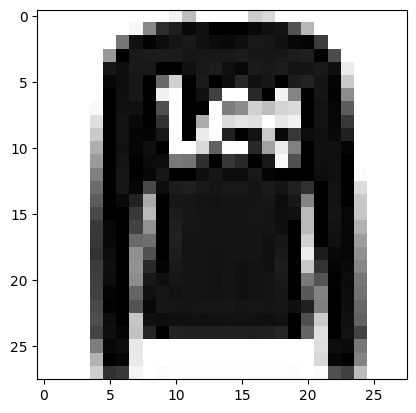

In [61]:
plt.imshow(img_raw, cmap=plt.cm.binary);

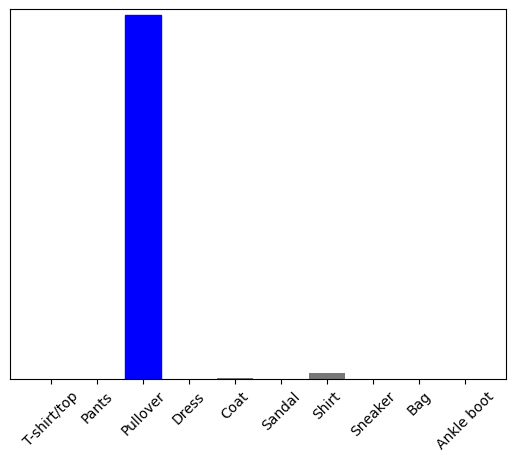

In [56]:
plot_val_array(1, pred[0], y_test)
_ = plt.xticks(range(n_classes), class_names, rotation=45);

Derived from: https://www.tensorflow.org/tutorials/keras/classification

```
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person
# obtaining a copy of this software and associated documentation 
# files (the "Software"), to deal in the Software without
# restriction, including without limitation the rights to use, 
# copy, modify, merge, publish, distribute, sublicense, and/or 
# sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following 
# conditions:
#
# The above copyright notice and this permission notice shall be
# included in all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, 
# EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
# OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
# NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT 
# HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, 
# WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR
# OTHER DEALINGS IN THE SOFTWARE.
```